In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
df.columns = ['Id','Gender',"Age",'Income',"Spending_score"]
df.head()

,Id,Gender,Age,Income,Spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
data = df[['Income','Spending_score']]
data.head()

,Income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
WCSS = []
silhouette_list = []
for k in range(2,6):
    model = KMeans(n_clusters=k,init='k-means++',n_init=100)
    model.fit(data)
    WCSS.append(model.inertia_)
    labels = model.labels_
    silhouette_list.append(silhouette_score(data,labels))

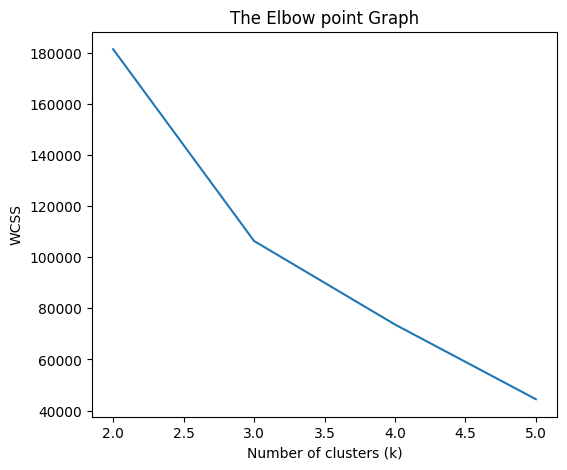

In [7]:
plt.figure(figsize=(6,5))
plt.plot(range(2,6),WCSS)
plt.title("The Elbow point Graph")
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [8]:
for k,score in enumerate(silhouette_list):
    print(f"The silhoute score for the {k+2} cluster is {score}")

The silhoute score for the 2 cluster is 0.2968969162503008
The silhoute score for the 3 cluster is 0.46761358158775435
The silhoute score for the 4 cluster is 0.4931963109249047
The silhoute score for the 5 cluster is 0.553931997444648


In [9]:
K = 5
final_model = KMeans(n_clusters=K,init='k-means++',n_init=100)
final_model.fit(data)

labels = final_model.labels_

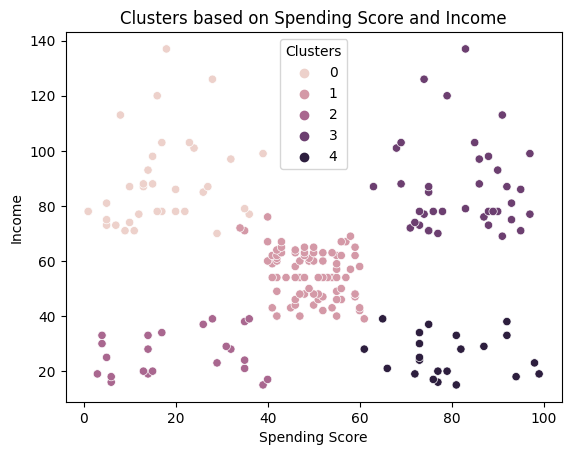

In [10]:
data['Clusters'] = labels
sns.scatterplot(x="Spending_score", y="Income", hue="Clusters", data=data)
plt.title('Clusters based on Spending Score and Income')
plt.xlabel('Spending Score')
plt.ylabel('Income')
plt.show()

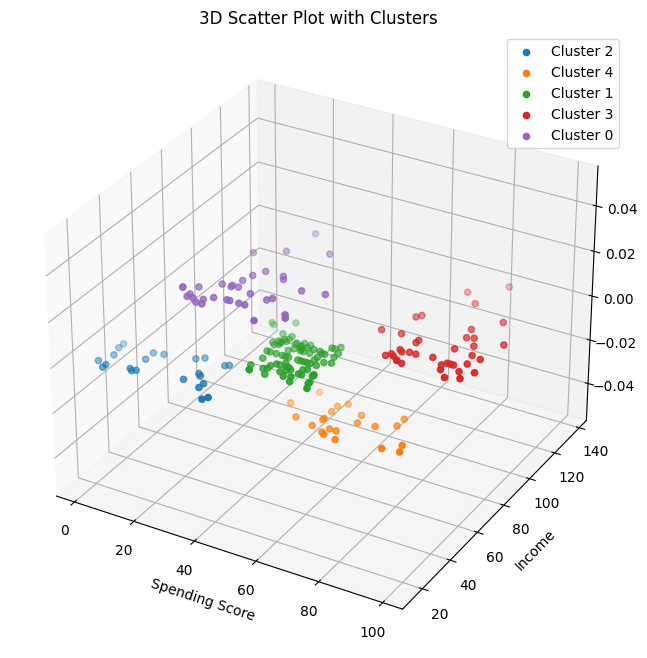

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data['Clusters'] = labels

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
clusters = data['Clusters'].unique()
for cluster in clusters:
    cluster_data = data[data['Clusters'] == cluster]
    ax.scatter(cluster_data['Spending_score'], cluster_data['Income'], label=f'Cluster {cluster}')

ax.set_xlabel('Spending Score')
ax.set_ylabel('Income')
ax.set_title('3D Scatter Plot with Clusters')

ax.legend()
plt.show()